# Transpiled circuit from IBM Cloud via API query

## Get temporary Access token from Auth API via API Token

In [8]:
with open('cloud_token') as file:
    token=file.read() #or just specify your API token from IBM Cloud here
with open('crn_service') as file:
    crn_service = file.read() #or just specify your CRN from your IBM Cloud instance here

In [9]:
import requests

url = 'https://iam.cloud.ibm.com/identity/token'
headers = {'Content-Type': 'application/x-www-form-urlencoded'}
data='grant_type=urn:ibm:params:oauth:grant-type:apikey&apikey='+token
auth_response = requests.post(url, headers= headers, data=data)
auth_id=auth_response.json()['access_token']
auth_type = auth_response.json()['token_type']

## Get transpiled circuit from IBM Cloud Runtime API

In [10]:
#this is just to get your latest job ID, you can just specify a job_id instead
from qiskit_ibm_runtime import QiskitRuntimeService
service=QiskitRuntimeService(channel="ibm_cloud",instance=crn_service,token=token)
job_id=service.jobs()[0].job_id()
job_id

'clecrk8hteu5rj6mk420'

In [11]:
url = 'https://iam.cloud.ibm.com/identity/token'
headers = {'Content-Type': 'application/x-www-form-urlencoded'}
data='grant_type=urn:ibm:params:oauth:grant-type:apikey&apikey='+token
auth_response = requests.post(url, headers= headers, data=data)
auth_id=auth_response.json()['access_token']
auth_type = auth_response.json()['token_type']

In [12]:
url = 'https://us-east.quantum-computing.cloud.ibm.com/jobs'
headers = { 'Content-Type': 'application/json',
            'Service-CRN': crn_service,
            'Authorization':auth_type + ' ' + auth_id}
response_result= requests.get(url+'/'+job_id+'/transpiled_circuits', headers=headers)

In [13]:
circuit_download= requests.get(response_result.json()['url'])
circuit_qasm = circuit_download.json()['transpiled_circuits']['qasm2']

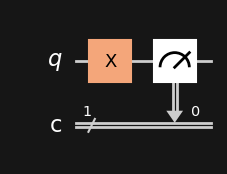

In [14]:
from qiskit import QuantumCircuit

circuit = QuantumCircuit.from_qasm_str(circuit_qasm[0])
circuit.draw()